SurveyMedley behavioral data check
==========================================

Some subjects from SurveyMedley dataset had 'junk' responses for some survey quesions. 
I this notebook I've performed few checks to identify problematic questions in the survey.

In [197]:
library(tidyverse)

In [198]:
survey = read_csv('/home/finc/Dropbox/Projects/SelfReg/data/behavioral/surveyMedley_data_all_subjects_tidy.csv')

Parsed with column specification:
cols(
  subject_id = col_character(),
  subject = col_character(),
  survey = col_character(),
  item_text = col_character(),
  trial_type = col_character(),
  coded_response = col_double(),
  response_time = col_double(),
  junk = col_character()
)


In [199]:
total_subjects <- survey %>%
    distinct(subject_id) %>%
    tally

total_subjects

n
105


Sorting quesions by the number of 'junk' (no answer) trials
-----------------------------------------------------------------

In [200]:
survey %>% 
    filter(junk == 'True') %>% 
    group_by(item_text, survey) %>%
    tally() %>% 
    arrange(desc(n))

item_text,survey,n
Do you sometimes like doing things that are a bit frightening?,impulsive_venture,14
"Sometimes when I feel bad, I can't seem to stop what I am doing even though it is making me feel worse.",upps,14
Do you welcome new and exciting experiences and sensations even if they are a little frightening and unconventional?,impulsive_venture,11
Would you enjoy the sensation of skiing very fast down a high mountain slope?,impulsive_venture,11
I have difficulty maintaining my focus on projects that take more than a few months to complete.,grit,4
I tend to act without thinking when I am really excited.,upps,3
"When I am really excited, I tend not to think of the consequences of my actions.",upps,3
"When overjoyed, I feel like I cant stop myself from going overboard.",upps,3
I have been obsessed with a certain idea or project for a short time but later lost interest.,grit,2
I often act without thinking through all the alternatives.,brief,2


Sorting surveys by the number of 'junk' (no answer) trials
-----------------------------------------------------------------

In [201]:
survey %>% 
    filter(junk == 'True') %>% 
    group_by(survey) %>%
    tally() %>% 
    arrange(desc(n))

survey,n
impulsive_venture,36
upps,25
brief,10
grit,9
future_time,5


Proportion of 'junk' trails depending of the survey type
-----------------------------------------------------------------

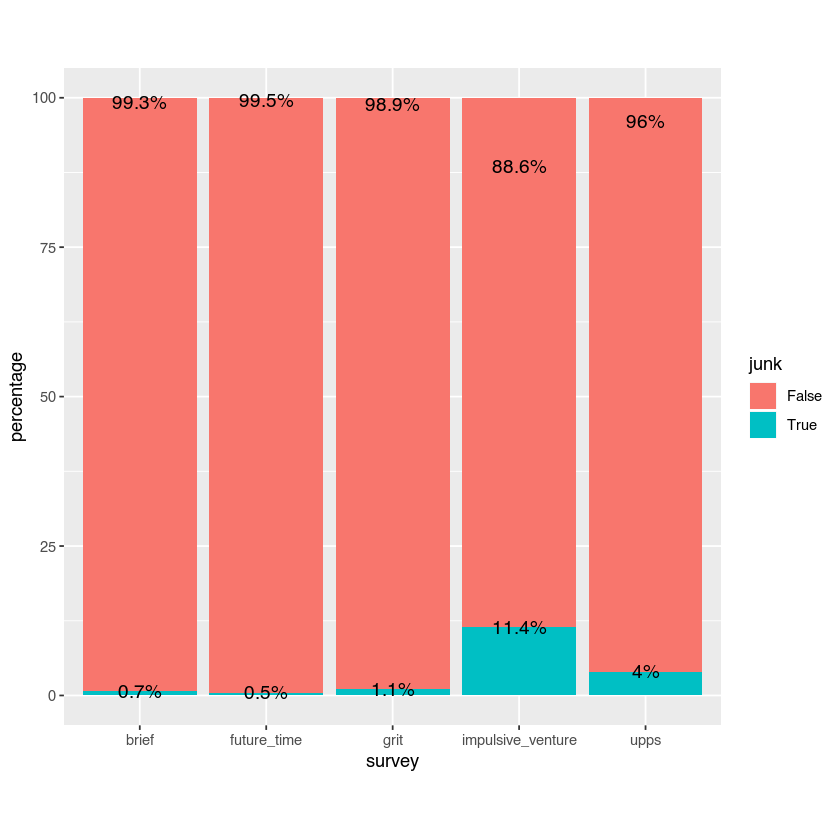

In [207]:
df <- survey %>% 
    mutate(text_char = nchar(item_text)) %>%
    group_by(survey) %>%
    mutate(total_count = n()) %>%
    group_by(survey, junk, total_count) %>%
    tally() %>% 
    mutate(percentage = (n/total_count)*100)

df %>% 
    ggplot()+
    geom_bar(aes(x = survey, y = percentage, fill = junk),  stat = "identity") +
    geom_text(aes(x = survey, y = percentage,label = paste0(round(percentage, digits = 1),"%")), size=4) + 
    theme(aspect.ratio = 1)

Number of subjects with 'junk' trials
-----------------------------------------------------------------

In [203]:
survey %>%
    filter(junk == 'True') %>%
    distinct(subject_id) %>%
    tally()

n
33


Number of subjects with 'junk' trials after excluding 'impulsive_venture' and 'upps' surveys
-----------------------------------------------------------------

In [204]:
survey %>%
    filter(!(survey %in% c('impulsive_venture', 'upps'))) %>% 
    filter(junk == 'True') %>%
    distinct(subject_id) %>%
    tally()

n
11


Getting proportion of 'junk' trials depending on number in a question
--------------------------------------------------------------------

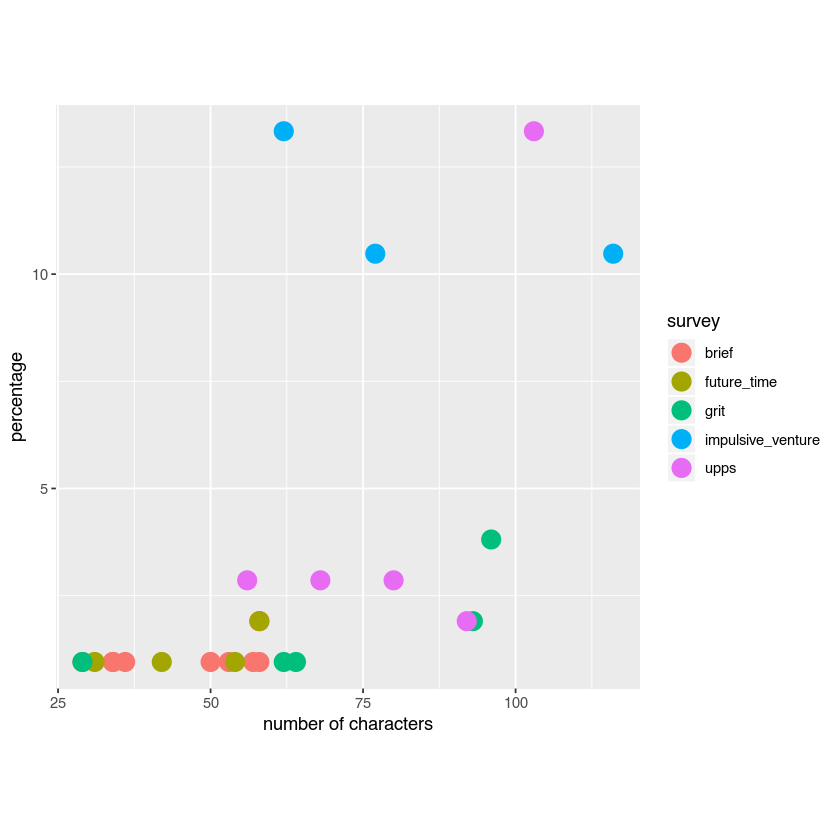

In [208]:
df_quest <- survey %>% 
    mutate(text_char = nchar(item_text)) %>%
    group_by(survey) %>%
    mutate(total_count = n()) %>%
    ungroup() %>%
    mutate(quest_count = 105) %>%
    group_by(survey, item_text, junk, total_count, text_char, quest_count) %>%
    tally() %>% 
    mutate(percentage = (n/quest_count)*100)

df_quest %>% 
    filter(junk == 'True') %>%
    arrange(percentage) %>%
    ggplot(aes(x = text_char, y = percentage)) +
    geom_point(aes(col = survey), size = 5) + 
    xlab('number of characters') +
    theme(aspect.ratio = 1)